In [1]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import tensorflow as tf
tf.test.gpu_device_name()

Mounted at /content/drive


'/device:GPU:0'

In [2]:
#import packages

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline
import re
import sys
import warnings
import pandas as pd
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import joblib

In [3]:
#needed for DNN 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from keras.regularizers import l2,l1
from keras.layers import Dropout
from keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from sklearn import preprocessing
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/dataset/bangla_comments_tokenized.csv', encoding='utf-8')
df.head()


,label,text,clean_text,tokenized_clean_text,tokenized_stem_text,token_length
0,Political,ছালা পাকিস্তানী বাশ দিয়া দাও ভর দিয়া হাটবো অভা...,ছালা পাকিস্তানীদের বাশ দিয়া দাও ভর দিয়া হাটবো ...,"['ছালা', 'পাকিস্তানীদের', 'বাশ', 'দিয়া', 'দাও'...","['ছালা', 'পাকিস্তানী', 'বাশ', 'দিয়া', 'দাও', '...",13
1,religious,ফ্যামিলিটা নাস্তিক থক আশা কর যায় না ফাউল,ফ্যামিলিটাই নাস্তিক থকে আশা করা যায় না ফাউল,"['ফ্যামিলিটাই', 'নাস্তিক', 'থকে', 'আশা', 'করা'...","['ফ্যামিলিটা', 'নাস্তিক', 'থক', 'আশা', 'কর', '...",8
2,sexual,তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপ...,তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপ...,"['তুই', 'মাগি', 'মাফ', 'তুই', 'আখিরাত', 'বিশ্ব...","['তুই', 'মাগি', 'মাফ', 'তুই', 'আখিরাত', 'বিশ্ব...",19
3,religious,সাফা কবির কঠিনফ্ ছিল তো চরমঘৃনা করি তুই নাস্তি...,সাফা কবির কঠিনফ্ ছিলাম তো চরমঘৃনা করি তুই নাস্...,"['সাফা', 'কবির', 'কঠিনফ্', 'ছিলাম', 'তো', 'চরম...","['সাফা', 'কবির', 'কঠিনফ্', 'ছিল', 'তো', 'চরমঘৃ...",14
4,not bully,সুপ সুপ হিরো,সুপার সুপার হিরো,"['সুপার', 'সুপার', 'হিরো']","['সুপ', 'সুপ', 'হিরো']",3


In [5]:
df.label.value_counts()

sexual       11000
not bully    11000
Political    11000
religious     9036
Name: label, dtype: int64

In [6]:
df['label'] = df['label'].replace({'not bully':'acceptable'})

In [7]:
# label encoding for output

sample_data = [2000,5000,10000,20000,30000,40000]

def label_encoding(category,bool):
  le = preprocessing.LabelEncoder()
  le.fit(category)
  encoded_labels = le.transform(category)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print("\n\t\t\t Label Encoding ","\nClass Names:-->",le.classes_)
    for i in sample_data:
      print(category[i],' ', encoded_labels[i],'\n')
    return labels

labels = label_encoding(df.label,True)


			 Label Encoding  
Class Names:--> ['Political' 'acceptable' 'religious' 'sexual']
acceptable   1 

acceptable   1 

religious   2 

Political   0 

acceptable   1 

religious   2 



In [8]:
#split the data in train, validation, test

def dataset_split(headlines,category):

    X,X_test,y,y_test = train_test_split(headlines,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(headlines),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))
  
    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [9]:
df.text=df.text.astype(str)

X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(df.text,labels)


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42036 
	Training		 34048 
	Test			 4204 
	Validation		 3784


In [10]:
#define perameters for GRU and padding and tokenization
vocab_size =43228
embedding_dim = 200
max_length = 217
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [11]:
# Train Data Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train.values)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train.values)
train_padded = pad_sequences(train_sequences,padding=padding_type, maxlen=max_length)

In [12]:
#Tokenizer Info
(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
#insightful info about tokens
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
  for w,c in ordered[:10]:
    print(w,"\t",c)

#Print all the information
print("Words --> Counts:")
tokenizer_info(word_counts,bool =True )
print("\nWords --> Documents:")
tokenizer_info(word_docs,bool =True )
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )    
print("\nTotal Documents -->",document_count)
print(f"Found {len(word_index)} unique tokens")

Words --> Counts:
না 	 12519
নাস্তিক 	 5723
কর 	 4397
যে 	 3829
এক 	 3482
আল্লাহ 	 3405
কথা 	 3368
বিশ্বাস 	 3351
হয় 	 3080
ও 	 3005

Words --> Documents:
না 	 8256
নাস্তিক 	 4683
কর 	 3590
যে 	 3081
এক 	 2965
হয় 	 2688
কথা 	 2654
আল্লাহ 	 2388
ও 	 2385
বিশ্বাস 	 2075

Words --> Index:
connection 	 43227
সবচেয়ের 	 43226
short 	 43225
বেহাত 	 43224
মঙ্গলশূভযাএা 	 43223
এমহামারী 	 43222
কসাইতো 	 43221
নির্ঘাত 	 43220
জন্মালে 	 43219
দুর্ভাগ্যইমাম 	 43218

Total Documents --> 34048
Found 43227 unique tokens


In [13]:
def padded_headlines(original,encoded,padded):
  print("\n\t\t\t Encoded Sequences ","\n")  
  print(original,"\n",encoded) 
  print("\n\t\t\t Paded Sequences \n",original,"\n",padded)

padded_headlines(X_train[2],train_sequences[2],train_padded[2])


			 Encoded Sequences  

তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপ চুদায় জন্ম নিছস তুই বাপ মার চুদা দেখ নাই 
 [44, 1570, 1076, 1110, 2805, 20397, 502, 148, 1278, 1421, 434, 11, 690, 1444, 755, 304, 6204, 408, 3282, 5691, 5288, 5289, 804, 2045, 13602, 2543, 5290, 1444, 2543, 4907, 4561, 636, 755, 10808, 5291, 860, 710, 10809, 20398, 4908, 20399, 900, 2806, 1021, 845, 3826, 6205, 3826, 4909, 2718, 1690, 1375]

			 Paded Sequences 
 তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপ চুদায় জন্ম নিছস তুই বাপ মার চুদা দেখ নাই 
 [   44  1570  1076  1110  2805 20397   502   148  1278  1421   434    11
   690  1444   755   304  6204   408  3282  5691  5288  5289   804  2045
 13602  2543  5290  1444  2543  4907  4561   636   755 10808  5291   860
   710 10809 20398  4908 20399   900  2806  1021   845  3826  6205  3826
  4909  2718  1690  1375     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0

In [14]:
# Validation Data Tokenization
validation_sequences = tokenizer.texts_to_sequences(X_valid.values)
validation_padded = pad_sequences(validation_sequences,padding=padding_type, maxlen=max_length)
#padded_headlines(X_valid[38000],validation_sequences[38000],validation_padded[38000])


In [15]:
# Test Data Tokenization
test_sequences = tokenizer.texts_to_sequences(X_test.values)
test_padded = pad_sequences(test_sequences,padding=padding_type, maxlen=max_length)
#padded_headlines(X_test[35000],test_sequences[35000],test_padded[5000])


In [16]:
train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test

In [17]:
#!unzip "/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/gloVe/bn_glove.39M.300d.zip" 

In [38]:
GLOVE_EMB = '/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/gloVe/bn_glove.39M.100d.txt'

In [39]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 178153 word vectors.


In [40]:
EMBEDDING_DIM = 100
vocab_size=43228

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [41]:
accuracy_threshold = 0.99
vocab_size = 43228
embedding_dim=100
#max_length = 21
num_category = 4
opt=Adam(lr=0.008)
path="/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/"

In [42]:
keras.backend.clear_session()
#callback function for early stopping
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()

**Bidirectional GRU**

In [43]:
# Saved the Best Model
filepath = path+"GloVe_BidGruModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 


GloVe_BGRU_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim , weights = [embedding_matrix], input_length=train_padded.shape[1],trainable = False),
    tf.keras.layers.Bidirectional(GRU(64,return_sequences=True,dropout=0.2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])

'''
BGRU_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(GRU(64,dropout=0.2)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    #tf.keras.layers.Dense(50, activation='relu'),
    #tf.keras.layers.Dense(10,kernel_regularizer='l2',bias_regularizer='l2', activation='relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(num_category, activation='softmax')
])'''


"\nBGRU_model = tf.keras.Sequential([\n    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),\n    tf.keras.layers.Bidirectional(GRU(64,dropout=0.2)),\n    tf.keras.layers.Dense(50, activation='relu'),\n    tf.keras.layers.Dense(50, activation='relu'),\n    tf.keras.layers.Dense(20, activation='relu'),\n    #tf.keras.layers.Dense(50, activation='relu'),\n    #tf.keras.layers.Dense(10,kernel_regularizer='l2',bias_regularizer='l2', activation='relu'),\n    \n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dropout(0.1),\n    tf.keras.layers.Dense(num_category, activation='softmax')\n])"

In [24]:
GloVe_BGRU_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
GloVe_BGRU_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 217, 300)          12968400  
_________________________________________________________________
bidirectional (Bidirectional (None, 217, 128)          140544    
_________________________________________________________________
dense (Dense)                (None, 217, 64)           8256      
_________________________________________________________________
dropout (Dropout)            (None, 217, 64)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 217, 64)           4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 217, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 13888)             0

In [25]:
num_epochs = 20
batch = 128

GloVe_BGRU_model_history = GloVe_BGRU_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)

Epoch 1/20
266/266 [==============================] - 41s 124ms/step - loss: 0.7751 - accuracy: 0.6926 - val_loss: 0.6290 - val_accuracy: 0.7540

Epoch 00001: val_accuracy improved from -inf to 0.75396, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/GloVe_BidGruModel.h5
Epoch 2/20
266/266 [==============================] - 30s 113ms/step - loss: 0.6003 - accuracy: 0.7738 - val_loss: 0.5872 - val_accuracy: 0.7709

Epoch 00002: val_accuracy improved from 0.75396 to 0.77088, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/GloVe_BidGruModel.h5
Epoch 3/20
266/266 [==============================] - 30s 114ms/step - loss: 0.5471 - accuracy: 0.7954 - val_loss: 0.5620 - val_accuracy: 0.7825

Epoch 00003: val_accuracy improved from 0.77088 to 0.78251, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/GloVe_BidGruModel.h5
Epoch 4/20
266/266 [=====

In [26]:
# Plot training results
def model_evaluate(history,directory,filename):
  H = history.history
  fig = plt.figure(figsize = (20, 7))
  plt.subplot(121)
  plt.plot(H['accuracy'], label = 'acc')
  plt.plot(H['val_accuracy'], label = 'val_acc')
  plt.grid()
  plt.legend()
  plt.subplot(122)
  plt.plot(H['loss'], label = 'loss')
  plt.plot(H['val_loss'], label = 'val_loss')
  plt.grid()
  plt.legend()
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")


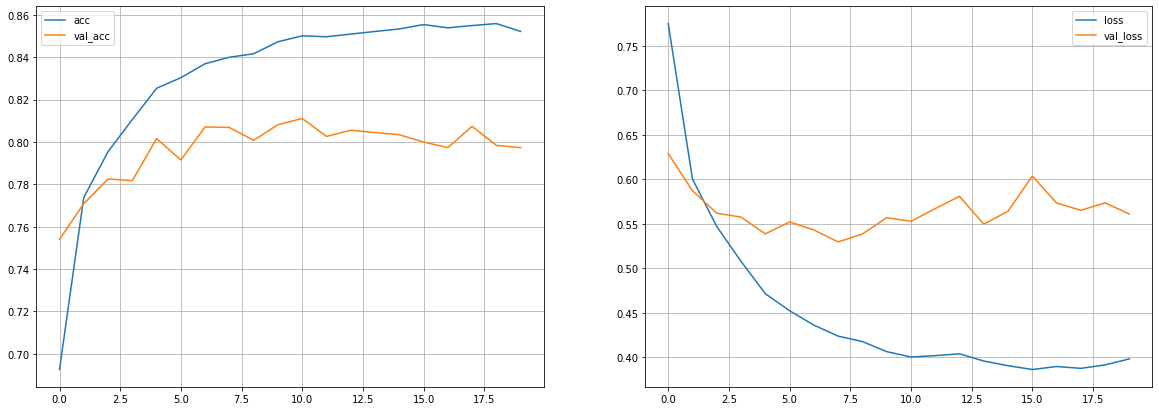

In [27]:

model_evaluate(GloVe_BGRU_model_history,"GloVe_BiGru","GloVe_Bi_Gru_evaluation")

In [28]:
#confusion matrix
def conf_matrix(y_pred,classfier,directory,filename):

  cm = confusion_matrix(y_test, y_pred) 
# Transform to df for easier plotting
  
  cm_df = pd.DataFrame(cm,
                       index = ['Political', 'acceptable', 'religious', 'sexual'], 
                       columns = ['Political', 'acceptable', 'religious', 'sexual'])
  plt.figure(figsize=(8,6))
  sn.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
  plt.title('\n'+classfier+'Accuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.xticks(rotation = 45)
  plt.yticks(rotation = 45)
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")
  plt.show()
  plt.close()

In [29]:
#Report generation

def report_generate(pred,classfier,directory,filename):
  report = pd.DataFrame(classification_report(y_true = testing_label_seq, y_pred = pred, output_dict=True)).transpose()
  report = report.rename(index={'0': 'Political','1':'acceptable','2':'religious','3':'sexual'})
  report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
  report=report.drop(["support"],axis=1)
  columns = ['precision','recall','f1-score']
  report.columns = columns
  plt = report.plot(kind='bar',figsize=(12,6))
  
  plot=plt.tick_params(rotation=40)
  plt.figure.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")
  
  return plot,report

In [30]:
#make predictions

model = load_model(path+"GloVe_BidGruModel.h5")
predictions = model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)


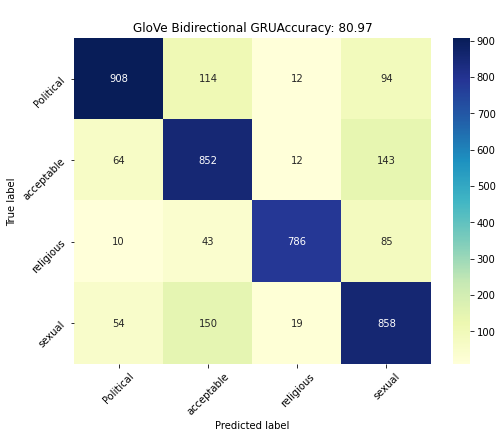

In [31]:
conf_matrix(y_pred,"GloVe Bidirectional GRU","GloVe_BiGru","GloVe_Bi_Gru_confusion_matrix")

,precision,recall,f1-score
Political,87.64,80.50,83.92
acceptable,73.51,79.55,76.41
religious,94.81,85.06,89.67
sexual,72.71,79.37,75.90
accuracy,80.97,80.97,80.97
macro avg,82.17,81.12,81.48
weighted avg,81.78,80.97,81.21


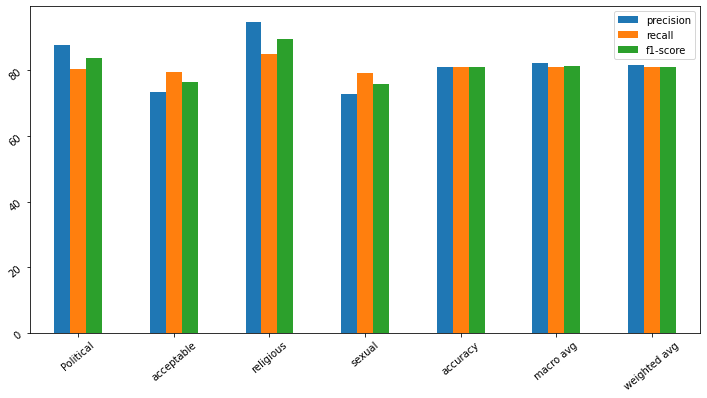

In [32]:
GRUreport=report_generate(y_pred,"GloVe Bidirectional GRU","GloVe_BiGru","GloVe_Bi_Gru_report")
GRUreport[1]

**LSTM**

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
filepath = path+"GloVe_LSTM.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 

GloVe_LSTM_model = Sequential()
GloVe_LSTM_model.add(Embedding(vocab_size, embedding_dim,weights = [embedding_matrix],trainable = False, input_length=train_padded.shape[1]))
GloVe_LSTM_model.add(SpatialDropout1D(0.2))
GloVe_LSTM_model.add(LSTM(64,return_sequences=True, recurrent_dropout=0.5))
GloVe_LSTM_model.add(LSTM(64,return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
GloVe_LSTM_model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1))
GloVe_LSTM_model.add(Dense(28, activation="relu"))
GloVe_LSTM_model.add(Dense(num_category, activation='softmax'))

GloVe_LSTM_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(GloVe_LSTM_model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 217, 100)          4322800   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 217, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 217, 64)           42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 217, 64)           33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 28)                1820      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1

In [ ]:
num_epochs = 40
batch = 128

GloVe_LSTM_history = GloVe_LSTM_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)


Epoch 1/40
266/266 [==============================] - 401s 1s/step - loss: 1.3838 - accuracy: 0.2579 - val_loss: 1.3827 - val_accuracy: 0.2733

Epoch 00001: val_accuracy improved from -inf to 0.27326, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/GloVe_LSTM.h5
Epoch 2/40
266/266 [==============================] - 358s 1s/step - loss: 1.3841 - accuracy: 0.2616 - val_loss: 1.3830 - val_accuracy: 0.2532

Epoch 00002: val_accuracy did not improve from 0.27326
Epoch 3/40
266/266 [==============================] - 349s 1s/step - loss: 1.3828 - accuracy: 0.2666 - val_loss: 1.3838 - val_accuracy: 0.2733

Epoch 00003: val_accuracy did not improve from 0.27326
Epoch 4/40
266/266 [==============================] - 368s 1s/step - loss: 1.3833 - accuracy: 0.2629 - val_loss: 1.3830 - val_accuracy: 0.2733

Epoch 00004: val_accuracy did not improve from 0.27326
Epoch 5/40
266/266 [==============================] - 364s 1s/step - loss: 1.3834 - accur

In [ ]:
#make predictions

GloVe_LSTM_model = load_model(path+"GloVe_LSTM.h5")
predictions = GloVe_LSTM_model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

In [ ]:
# Plot training results
model_evaluate(GloVe_LSTM_history,"GloVe_LSTM","GloVe_LSTM_evaluation")


In [ ]:
conf_matrix(y_pred,"GloVe Long Short Term Memory","GloVe_LSTM","GloVe_LSTM_confusion_matrix")

In [ ]:
GloVe_LSTMreport=report_generate(y_pred,"GloVe Long Short Term Memory","GloVe_LSTM","GloVe_LSTM_report")
GloVe_LSTMreport[1]

In [ ]:
#testing out
txt = ["এজন্য ভারত বাংলাদেশে এসে হোয়াইট ওয়াস হয়েগেছে মনে নেই"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = GloVe_LSTM_model.predict(padded)

labels = ['Political', 'acceptable', 'religious', 'sexual']
print(pred, labels[np.argmax(pred)])

**C-LSTM**

In [ ]:
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

filepath = path+"GloVe_C-LSTM.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 
# create the model
GloVe_C_LSTM_model = Sequential()
GloVe_C_LSTM_model.add(Embedding(vocab_size, embedding_dim,weights = [embedding_matrix],trainable = False, input_length=train_padded.shape[1]))
GloVe_C_LSTM_model.add(SpatialDropout1D(0.7))
GloVe_C_LSTM_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
GloVe_C_LSTM_model.add(MaxPooling1D(pool_size=2))
GloVe_C_LSTM_model.add(LSTM(128, dropout=0.7, recurrent_dropout=0.7))
GloVe_C_LSTM_model.add(Dense(4, activation='softmax'))

GloVe_C_LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(GloVe_C_LSTM_model.summary())


In [ ]:
num_epochs = 30
batch = 128

GloVe_C_LSTM_history = GloVe_C_LSTM_model.fit(train_padded, train_label_seq,
                           epochs=num_epochs,
                           batch_size = batch,
                           validation_data=(validation_padded,valid_label_seq),
                           verbose=1,
                           callbacks = callback_list)


In [ ]:
#make predictions

GloVe_C_LSTM_model = load_model(path+"GloVe_C-LSTM.h5")
predictions = GloVe_C_LSTM_model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

In [ ]:
# Plot training results
model_evaluate(GloVe_C_LSTM_history,"GloVe_C_LSTM","GloVe_C_LSTM_evaluation")


In [ ]:
conf_matrix(y_pred,"GloVe CNN-Long Short Term Memory","GloVe_C_LSTM","GloVe_C_LSTM_confusion_matrix")

In [ ]:
GloVe_C_LSTMreport=report_generate(y_pred,"GloVe CNN-Long Short Term Memory","GloVe_C_LSTM","GloVe_C_LSTM_report")
GloVe_C_LSTMreport[1]